In this file I'm gonna predict the 'Performance Index' of a student dataframe

In [81]:
# firstly we import the data handling and visualization

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# The I'm gonna import Linear regression, training and error finding

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# For this project Standarization will help me prevent data leakage
# by shrnking my dataframe into a normal size

from sklearn.preprocessing import StandardScaler

In [82]:
# Let's store the data frame in df

df = pd.read_csv('data/Student_data.csv')


# Then I'm going to see whats inside


df.head()

# The information seems good

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0


In [83]:
df.shape

# The shape of the dataframe is very telling, vuz now I know
# We have a considerable amount of data of 10000 students

(10000, 5)

The 'Performance Index' seems to have a strong correlation with some other variables based on the pairplot.


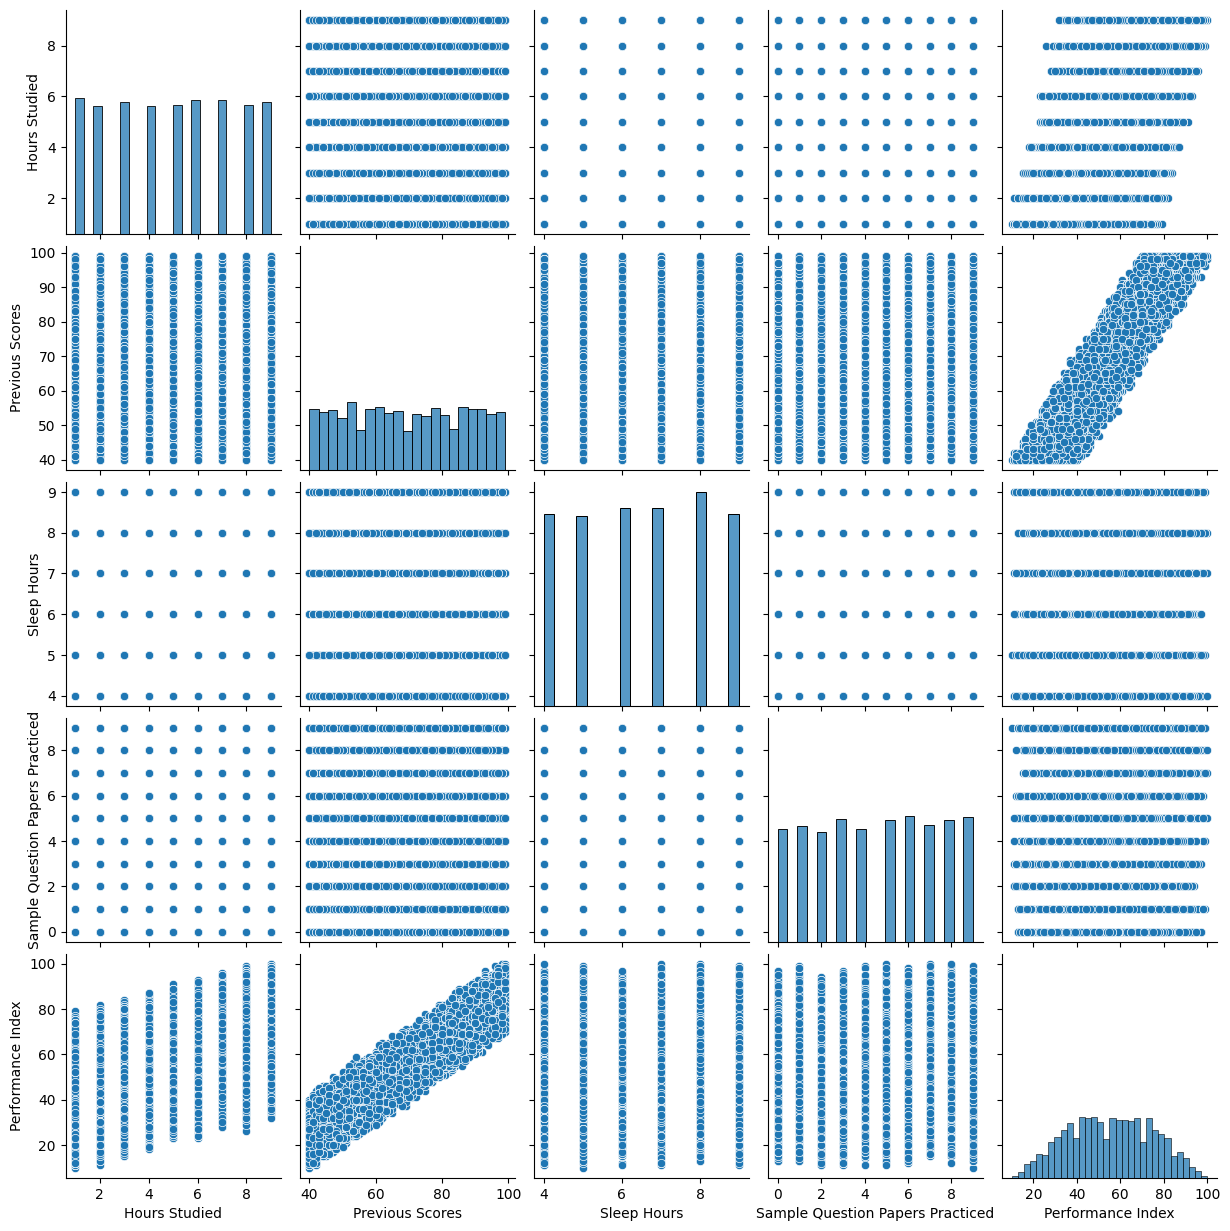

In [84]:
# This pairplot allows us to visually inspect the relationships between different variables.
# It helps identify potential correlations and patterns, including whether a linear relationship might exist.
sns.pairplot(df)

print("The 'Performance Index' seems to have a strong correlation with some other variables based on the pairplot.")


As expected, correlations of 0.92 and 0.37 show strong and moderate relationships, respectively.


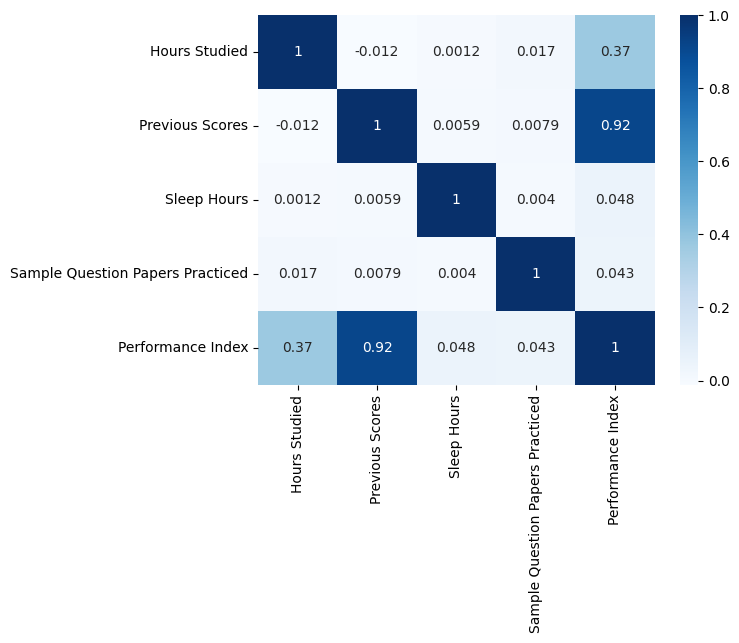

In [85]:
# The heatmap displays the correlation matrix, making it easy to follow the relationships between variables.
# A value of 0 indicates no correlation, values close to 1 indicate strong positive correlation, 
# and negative values indicate negative correlation.
sns.heatmap(df.corr(), annot=True, cmap='Blues')

print("As expected, correlations of 0.92 and 0.37 show strong and moderate relationships, respectively.")


I like the shape of the density plot; it seems close to a normal distribution.


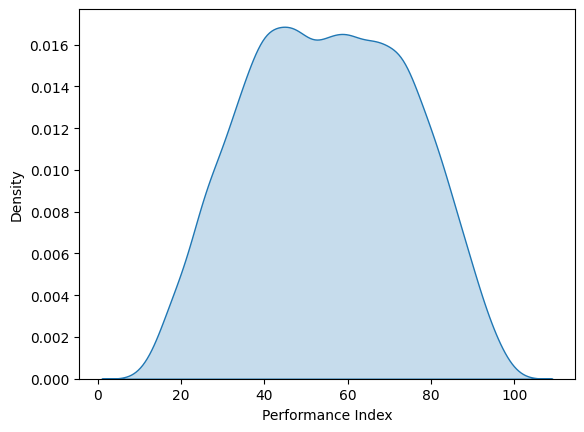

In [86]:
# This density plot (KDE) helps us see the distribution of 'Performance Index'. 
# It is useful for checking if the data follows a normal distribution by showing its shape.
sns.kdeplot(df, x='Performance Index', fill=True)

print("I like the shape of the density plot; it seems close to a normal distribution.")


The boxplot seems good, I see no potential outliers


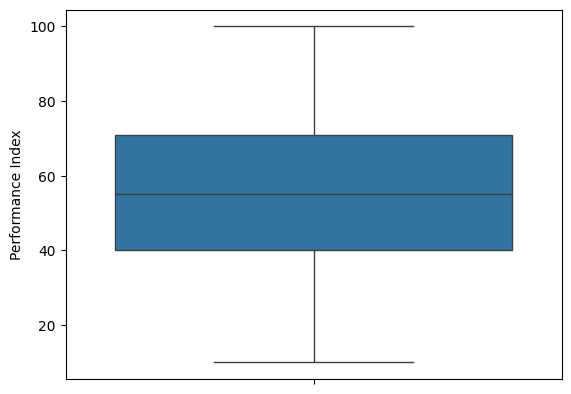

In [87]:
# The boxplot helps us visualize the distribution of the 'Performance Index' 
# and identify potential outliers. It shows the median, quartiles, and any anomalies.

sns.boxplot(df['Performance Index'])
print("The boxplot seems good, I see no potential outliers")

In [88]:
# Now I'm gonna need to see how columns are arranged to create our main vectors

df.columns.tolist()

['Hours Studied',
 'Previous Scores',
 'Sleep Hours',
 'Sample Question Papers Practiced',
 'Performance Index']

In [89]:
# X is every variable but Performance Index

X = df.drop(df.columns[-1], axis= 1)

# Y is Performance Index
Y = df[df.columns[-1]]

In [90]:
'''
X_train, X_test, y_train, y_test => SET

70% if the data is for training

our seed is gonna be 101
'''

X_train, X_test, y_train, y_test = train_test_split(X, Y,train_size=0.7, random_state=101)

In [91]:
# I'm going to Standarize my values by calling the object

scaler = StandardScaler()

# then with fit i can extract the mean and standard deviaton from the training values
# and transform it into a normal scale

X_train_scaled = scaler.fit_transform(X_train)

# With the mean and standard deviation extracted from the training values
# we can use them for the testing values

X_test_scaled = scaler.transform(X_test)

# also this also helps us from preventing data leakage 

In [92]:
# We call the object for a model

model = LinearRegression()

# Then we train it

model.fit(X_train_scaled, y_train)

LinearRegression()

In [93]:
y_pred = model.predict(X_test_scaled)
y_pred

# we get our predictions

array([44.67439374, 95.83055254, 30.19738252, ..., 17.60681142,
       69.11076136, 73.09170662])

In [94]:
print(f"""
coefficients: {model.coef_}
intercept: {model.intercept_}
RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}
R2: {r2_score(y_test, y_pred)}
""")

# The RMSE of 2.04 is relatively low, which indicates that the model's predictions are close to the actual values.
print("RMSE: A value of 2.04 is quite low, indicating the model predicts the target variable with good accuracy.")

# The R2 score of 0.99 is very close to 1, which means the model explains 98.85% of the variance in the data.
print("R2: With a score of 0.99, the model fits the data extremely well, explaining most of the variance.")



coefficients: [ 7.39905678 17.72140965  0.83715087  0.55276954]
intercept: 55.298857142857145
RMSE: 2.0406203642110565
R2: 0.9885277194859181

RMSE: A value of 2.04 is quite low, indicating the model predicts the target variable with good accuracy.
R2: With a score of 0.99, the model fits the data extremely well, explaining most of the variance.


In [95]:
#I'm going to calculate residuals by subtrating our predictions

residuals = y_test - model.predict(X_test_scaled)

#This converts the residuals (which are likely in a Pandas Series) into a NumPy array. 
# This makes it easier to work with for further analysis or visualizations.

residuals = residuals.values


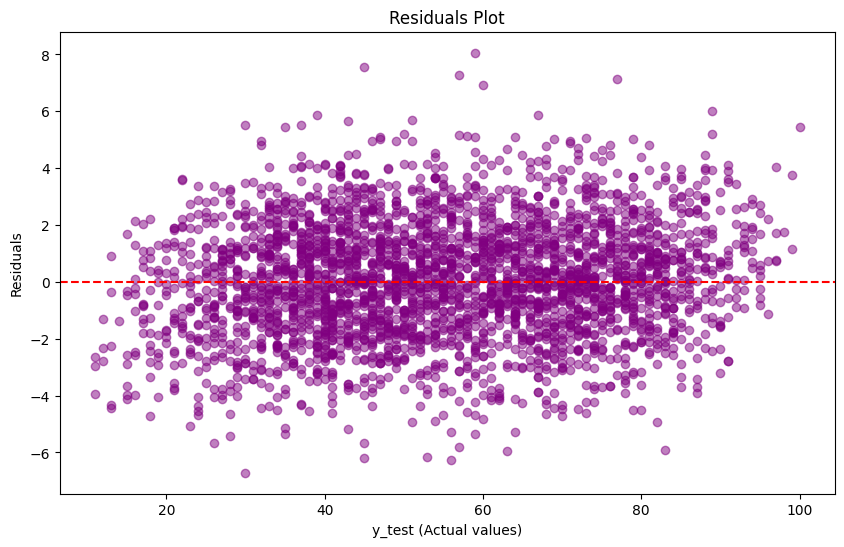

The residuals seem good; they're centered around zero with more density near the center, suggesting the model is performing well.


In [96]:
# This plot helps us visualize the behavior of residuals.
# Ideally, residuals should be randomly scattered around zero, with no clear pattern, indicating a good model fit.
# If the residuals are centered around zero and show no obvious pattern, it suggests that the model is performing well.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('y_test (Actual values)')
plt.ylabel('Residuals')
plt.show()

# Residuals seem to be normally distributed with better density near zero, indicating a good model fit.
print("The residuals seem good; they're centered around zero with more density near the center, suggesting the model is performing well.")


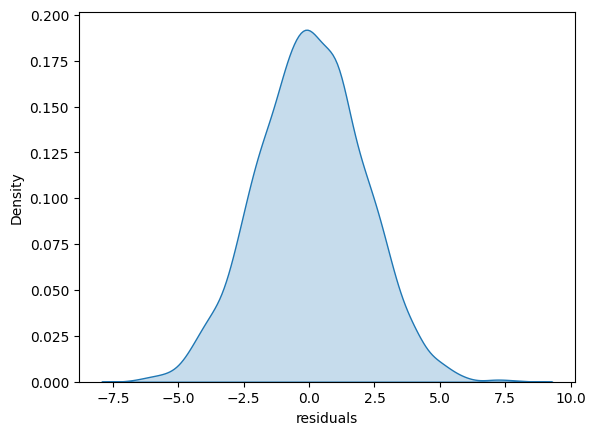

The residuals density looks good, and tells us we may have a trusty model


In [97]:
res_df = pd.DataFrame({'residuals':residuals})
sns.kdeplot(res_df, x = 'residuals', fill=True)
plt.show()

print("The residuals density looks good, and tells us we may have a trusty model")

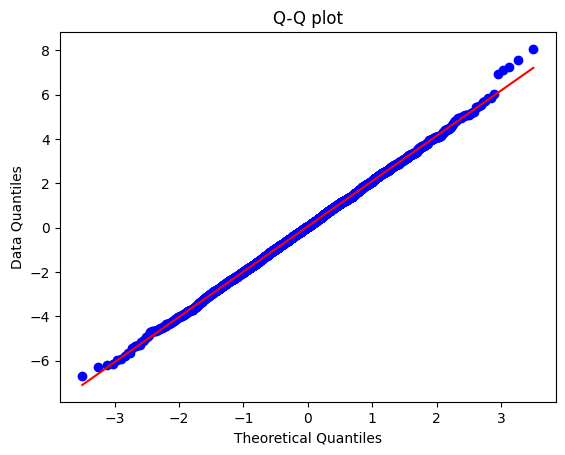

The Q-Q plot looks almost perfect


In [98]:
(osm, osr), (slope, intercept, r) = stats.probplot(residuals, dist='norm', plot = plt)
plt.title('Q-Q plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Data Quantiles')
plt.show()

print("The Q-Q plot looks almost perfect")

In [99]:
statistic, p_value = stats.shapiro(residuals)
print(f'statistic: {statistic}')
print(f'p value: {p_value}')

alpha = 0.05
if p_value <= alpha:
    print('We reject the null hypothesis, the data do not follow a normal distribution') 
else:
    print('We fail to reject the null hypothesis. The data might follow a normal distribution')
    
print("as expected and seen in previous excercises, the data looked good overall")


statistic: 0.9995412230491638
p value: 0.7329094409942627
We fail to reject the null hypothesis. The data might follow a normal distribution
as expected and seen in previous excercises, the data looked good overall


In [100]:
# I called a function to see what were the maximum values and made a little prediction teste

df.max()

Hours Studied                         9.0
Previous Scores                      99.0
Sleep Hours                           9.0
Sample Question Papers Practiced      9.0
Performance Index                   100.0
dtype: float64

In [101]:
df.min()

Hours Studied                        1.0
Previous Scores                     40.0
Sleep Hours                          4.0
Sample Question Papers Practiced     0.0
Performance Index                   10.0
dtype: float64

In [102]:
# I'm going to create an avg student based on random values

New_student = pd.DataFrame(
    {
        'Hours Studied': [6],
        'Previous Scores': [80],
        'Sleep Hours': [8],
        'Sample Question Papers Practiced': [7],  
    }
)
# Scale the new student data using the same scaler that was used on training data
New_student_scaled = scaler.transform(New_student)


# Use the trained model to predict the 'Performance Index' for this new student.
pred = model.predict(New_student_scaled)

print(f"based on the prediction model our new student would achieve a {pred[0]} as Performance Index")

based on the prediction model our new student would achieve a 70.0141178520972 as Performance Index


In [103]:
# Now I wanna make a test with the maximum values to see where it goes
New_student = pd.DataFrame(
    {
        'Hours Studied': [9],
        'Previous Scores': [99],
        'Sleep Hours': [9],
        'Sample Question Papers Practiced': [9],  
    }
)


# Scale the new student data using the same scaler that was used on training data
New_student_scaled = scaler.transform(New_student)


# Use the trained model to predict the 'Performance Index' for this new student.
pred = model.predict(New_student_scaled)


print(f"Our model with these characteristics said df.max() whould get 100.00 in Performance index and we got {pred[0]} wich is close")


Our model with these characteristics said df.max() whould get 100.00 in Performance index and we got 98.79319756266116 wich is close


In [104]:
# For final test I'm going to exceed the values to see what happens

# Now I wanna make a test with the maximum values to see where it goes

# think the result would be close to 200.00 with a +- 10
New_student = pd.DataFrame(
    {
        'Hours Studied': [18],
        'Previous Scores': [198],
        'Sleep Hours': [18],
        'Sample Question Papers Practiced': [18],  
    }
)


# Scale the new student data using the same scaler that was used on training data
New_student_scaled = scaler.transform(New_student)


# Use the trained model to predict the 'Performance Index' for this new student.
pred = model.predict(New_student_scaled)


print(f"We got {pred[0]}  which is impossible, but it was a fun experiment")

We got 231.42275477730632  which is impossible, but it was a fun experiment


In [120]:
# For final test I'm going to exceed the values to see what happens

# Now I wanna make a test with the maximum values to see where it goes

# think the result would be close to 200.00 with a +- 10
New_student = pd.DataFrame(
    {
        'Hours Studied': [1],
        'Previous Scores': [40],
        'Sleep Hours': [24*7.5],
        'Sample Question Papers Practiced': [0],  
    }
)


# Scale the new student data using the same scaler that was used on training data
New_student_scaled = scaler.transform(New_student)


# Use the trained model to predict the 'Performance Index' for this new student.
pred = model.predict(New_student_scaled)


print(f"{pred[0]:.2f} ")

98.14 


In [130]:
# For final test I'm going to exceed the values to see what happens

# Now I wanna make a test with the maximum values to see where it goes

# think the result would be close to 200.00 with a +- 10
New_student = pd.DataFrame(
    {
        'Hours Studied': [0],
        'Previous Scores': [0],
        'Sleep Hours': [24*11.5],
        'Sample Question Papers Practiced': [0],  
    }
)


# Scale the new student data using the same scaler that was used on training data
New_student_scaled = scaler.transform(New_student)


# Use the trained model to predict the 'Performance Index' for this new student.
pred = model.predict(New_student_scaled)


print(f"{pred[0]:.2f} ")

101.70 
